<a href="https://colab.research.google.com/github/deepakawl/teaching/blob/main/Ideal_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Install and import packages

In [1]:
!pip install dmba
!pip install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 59.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd

#from pathlib import Path
#from sklearn import preprocessing
#from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn import metrics
#from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt

#from dmba import classificationSummary, regressionSummary, plotDecisionTree
%matplotlib inline

### 2. Read and inspect data

In [3]:
# Raw data along with 12 indicators
data_df = pd.read_csv('https://raw.githubusercontent.com/deepakawl/teaching/refs/heads/main/ideal_insurance_indicators_updtd.csv')

In [4]:
# Check data is imported
data_df.shape

(100000, 47)

In [5]:
# Check first few rows
data_df.head()

,tpa,policy_ref,member_id,sex,dob,policy_start_dt,policy_end_dt,prod_code,policy_type,sum_insured,...,Ind3,Ind4,Ind5,Ind6,Ind7,Ind8,Ind9,Ind10,Ind11,Ind12
0,A,AA0-8XJSW35UU,ET3-N17GT2,M,10-JAN-1952,09-AUG-2009,09-JUL-2010,A,O,11250,...,0,0,0,1,1,0,1,0,1,0
1,A,AA2-6FSBQ43KU,ME5-D72GG1,M,27-JAN-1989,25-DEC-2008,24-DEC-2009,A,A,2500,...,0,0,0,1,1,0,1,0,1,0
2,A,AA2-6SYDY41JO,TY1-Y49PC4,M,11-JAN-1976,06-MAY-2009,08-APR-2010,A,A,5000,...,0,1,0,1,0,1,1,0,0,1
3,A,AA2-7LHAM76BG,EX1-Y52TI2,F,28-FEB-1977,26-MAY-2009,25-MAY-2010,A,A,2500,...,0,0,0,1,1,0,1,0,1,0
4,A,AA3-6WKNK59EW,KO9-A47OB0,M,24-JUL-1959,19-OCT-2008,18-OCT-2009,A,A,2500,...,0,0,1,1,1,1,1,0,1,0


In [6]:
# Extract the column names
data_df.columns

Index(['tpa', 'policy_ref', 'member_id', 'sex', 'dob', 'policy_start_dt',
       'policy_end_dt', 'prod_code', 'policy_type', 'sum_insured', 'claim_ref',
       'claim_dt', 'hospital_id', 'hos_zipcode', 'admit_dt', 'discharge_dt',
       'payment_dt', 'claim_amt', 'nursing_chg', 'surgery_chg', 'cons_fee',
       'test_chg', 'pharmacy_cost', 'other_chg', 'pre_hosp_exp',
       'post_hosp_exp', 'other_chg_non_hosp', 'copayment', 'settle_amt',
       'payment_type', 'hosp_type', 'recommendation', 'fraud',
       'Claims_cnt_Ind2', 'Claims_cnt_Ind3', 'Ind1', 'Ind2', 'Ind3', 'Ind4',
       'Ind5', 'Ind6', 'Ind7', 'Ind8', 'Ind9', 'Ind10', 'Ind11', 'Ind12'],
      dtype='object')

We will only use the 12 Indicator variable. Fraud is the outcome variable.

In [7]:
# Keeping only relevant columns
df = data_df[['Ind1', 'Ind2', 'Ind3', 'Ind4','Ind5','Ind6', 'Ind7', 'Ind8', 'Ind9', 'Ind10', 'Ind11', 'Ind12', "fraud"]]
df.head()

,Ind1,Ind2,Ind3,Ind4,Ind5,Ind6,Ind7,Ind8,Ind9,Ind10,Ind11,Ind12,fraud
0,0,0,0,0,0,1,1,0,1,0,1,0,1
1,0,0,0,0,0,1,1,0,1,0,1,0,0
2,0,0,0,1,0,1,0,1,1,0,0,1,0
3,1,0,0,0,0,1,1,0,1,0,1,0,1
4,1,0,0,0,1,1,1,1,1,0,1,0,0


In [8]:
# Check missing values
df.isnull().sum()

,0
Ind1,0
Ind2,0
Ind3,0
Ind4,0
Ind5,0
Ind6,0
Ind7,0
Ind8,0
Ind9,0
Ind10,0


### 3. Prepare data for modeling

In [9]:
# Create a y response variable and an X collection of predictors
y = data_df['fraud']
X = data_df[['Ind1', 'Ind2', 'Ind3', 'Ind4','Ind5','Ind6', 'Ind7', 'Ind8', 'Ind9', 'Ind10', 'Ind11', 'Ind12']]

In [10]:
X.columns

Index(['Ind1', 'Ind2', 'Ind3', 'Ind4', 'Ind5', 'Ind6', 'Ind7', 'Ind8', 'Ind9',
       'Ind10', 'Ind11', 'Ind12'],
      dtype='object')

In [11]:
y.value_counts(normalize=True)

,proportion
fraud,
0,0.78308
1,0.21692


### 4. Logistic Regression Model

In [12]:
from sklearn.linear_model import LogisticRegression, LinearRegression  # Check this

logit_reg = LogisticRegression(max_iter = 2000) # max_iter is supplied to avoid convergence failure

logit_reg.fit(X,y)

LogisticRegression(max_iter=2000)

Make Predictions at the threshold = 0.2

In [13]:
from sklearn.metrics import confusion_matrix

def saving(y, model, threshold):

  pred_y = np.where(model.predict_proba(X)[:,1] >= threshold,1,0)
  conf = confusion_matrix(y, pred_y)

  TN = conf[0,0]
  FP = conf[0,1]
  FN = conf[1,0]
  TP = conf[1,1]
  TPp = TP / (TN+FP+FN+TP)
  FPp = FP / (TN+FP+FN+TP)
  FNp = FN / (TN+FP+FN+TP)
  Accuracy = (TP+TN) / (TN+FP+FN+TP)

  Net_savings = ( 3750 * TP - 1250 * FP - 3750 *FN) / 1000000

#  print(f'Cutoff: {threshold: .3f}  Net_savings (in $mn): {Net_savings: .3f}  Accuracy: {Accuracy: 5.1%}  FP rate: {FPp: 5.1%}   ')
  print(f'! {threshold:>5.3f}  |         {Net_savings:>7.3f}       |    {Accuracy:>5.1%}   |  {TPp:>5.1%}   |  {FPp:>5.1%}   |  {FNp:>5.1%}   |')
  print('--------------------------------------------------------------------------------')

  return Net_savings

In [14]:
print('--------------------------------------------------------------------------------')
print('| Cutoff  | Net savings (in $mn) |  Accuracy  | TP rate  | FP rate  | FN rate  |')
print('--------------------------------------------------------------------------------')
for cutoff in np.arange(0.20,0.241,0.002):
  saving(y=y, model=logit_reg, threshold=cutoff)

--------------------------------------------------------------------------------
| Cutoff  | Net savings (in $mn) |  Accuracy  | TP rate  | FP rate  | FN rate  |
--------------------------------------------------------------------------------
! 0.200  |         -21.628       |    30.8%   |  19.1%   |  66.5%   |   2.6%   |
--------------------------------------------------------------------------------
! 0.202  |         -22.505       |    31.6%   |  18.8%   |  65.4%   |   2.9%   |
--------------------------------------------------------------------------------
! 0.204  |         -23.165       |    32.3%   |  18.5%   |  64.5%   |   3.2%   |
--------------------------------------------------------------------------------
! 0.206  |         -26.590       |    36.5%   |  17.1%   |  59.0%   |   4.6%   |
--------------------------------------------------------------------------------
! 0.208  |         -27.837       |    37.6%   |  16.7%   |  57.4%   |   5.0%   |
----------------------------

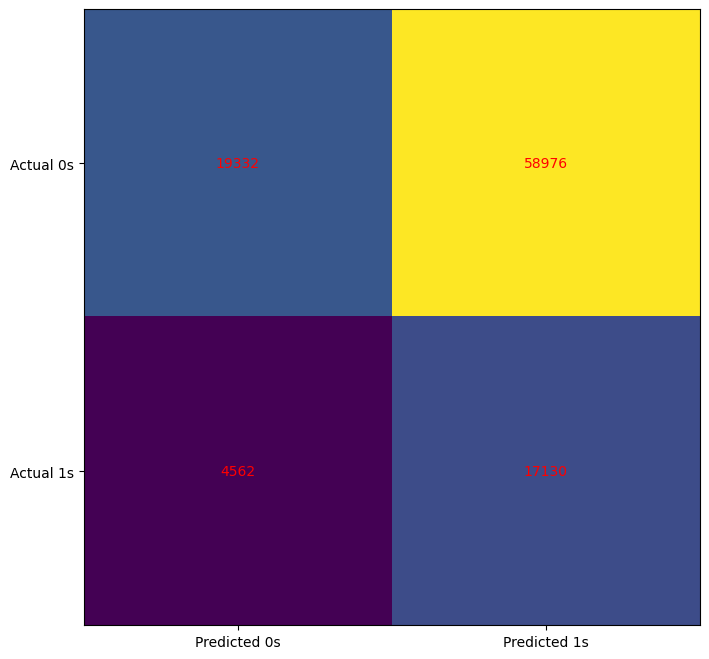

              precision    recall  f1-score   support

           0       0.81      0.25      0.38     78308
           1       0.23      0.79      0.35     21692

    accuracy                           0.36    100000
   macro avg       0.52      0.52      0.36    100000
weighted avg       0.68      0.36      0.37    100000



In [15]:
threshold = 0.206

pred_y = np.where(logit_reg.predict_proba(X)[:,1] >= 0.206,1,0)
conf = confusion_matrix(y, pred_y)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf[i, j], ha='center', va='center', color='red')
plt.show()

### Print Classification Report
from sklearn.metrics import classification_report
print(classification_report(y, pred_y))

Evaluate the performance of the LR model

### 6. Random Forest Model

This will take a while but a RF model is more prune to overfitting as it use many trees to generate an output.

We don't use GridSearchCV for Random Forest in the class in the interest of time. Otherwise, you would do that.

In [16]:
## Initialize an RF classifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor # Check this

rf_classifier=RandomForestClassifier()

rf_classifier.fit(X, y)

RandomForestClassifier()

Evaluate performance

In [17]:
print('--------------------------------------------------------------------------------')
print('| Cutoff  | Net savings (in $mn) |  Accuracy  | TP rate  | FP rate  | FN rate  |')
print('--------------------------------------------------------------------------------')
for cutoff in np.arange(0.20,0.241,0.002):
  saving(y=y, model=rf_classifier, threshold=cutoff)

--------------------------------------------------------------------------------
| Cutoff  | Net savings (in $mn) |  Accuracy  | TP rate  | FP rate  | FN rate  |
--------------------------------------------------------------------------------
! 0.200  |         -21.797       |    35.0%   |  18.2%   |  61.5%   |   3.5%   |
--------------------------------------------------------------------------------
! 0.202  |         -25.751       |    39.6%   |  16.6%   |  55.3%   |   5.1%   |
--------------------------------------------------------------------------------
! 0.204  |         -25.966       |    39.8%   |  16.6%   |  55.0%   |   5.1%   |
--------------------------------------------------------------------------------
! 0.206  |         -26.256       |    40.1%   |  16.4%   |  54.6%   |   5.2%   |
--------------------------------------------------------------------------------
! 0.208  |         -26.758       |    40.7%   |  16.3%   |  53.9%   |   5.4%   |
----------------------------

### 7. Decision Tree Model

In [18]:
#from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor  # Check this
from sklearn import tree

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X, y)

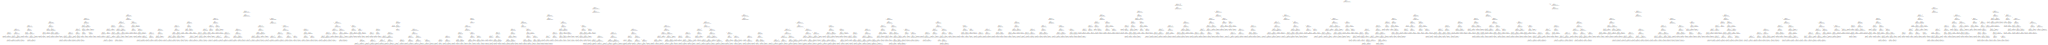

In [19]:
import graphviz
#tree.plot_tree(dtree)

dot_data = tree.export_graphviz(dtree, out_file=None, rounded=True, special_characters=True)
graphviz.Source(dot_data)

In [20]:
print('--------------------------------------------------------------------------------')
print('| Cutoff  | Net savings (in $mn) |  Accuracy  | TP rate  | FP rate  | FN rate  |')
print('--------------------------------------------------------------------------------')
for cutoff in np.arange(0.20,0.241,0.002):
  saving(y=y, model=dtree, threshold=cutoff)

--------------------------------------------------------------------------------
| Cutoff  | Net savings (in $mn) |  Accuracy  | TP rate  | FP rate  | FN rate  |
--------------------------------------------------------------------------------
! 0.200  |         -21.961       |    35.2%   |  18.1%   |  61.2%   |   3.6%   |
--------------------------------------------------------------------------------
! 0.202  |         -24.434       |    38.1%   |  17.1%   |  57.3%   |   4.5%   |
--------------------------------------------------------------------------------
! 0.204  |         -25.840       |    39.7%   |  16.6%   |  55.2%   |   5.1%   |
--------------------------------------------------------------------------------
! 0.206  |         -26.499       |    40.4%   |  16.3%   |  54.2%   |   5.3%   |
--------------------------------------------------------------------------------
! 0.208  |         -28.869       |    42.9%   |  15.5%   |  50.9%   |   6.2%   |
----------------------------

# End of Code